Importing Dependencies

In [309]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso

Data Collection & Analysis

In [310]:
#Loading the data from csv file in Pndas DataFrame
insurance_dataset=pd.read_csv("/content/insurance.csv")

In [311]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [312]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [313]:
# getting some about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [314]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis


In [315]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-2913701249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


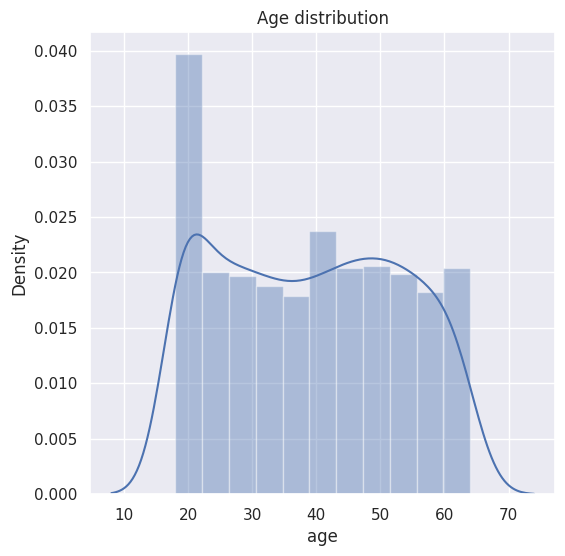

In [316]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

In [317]:
# Gender column

Text(0.5, 1.0, 'Sex destribution')

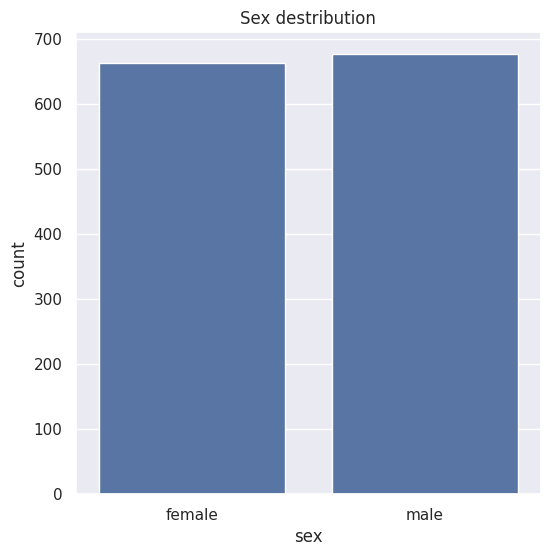

In [318]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex destribution')

In [319]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-861599959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


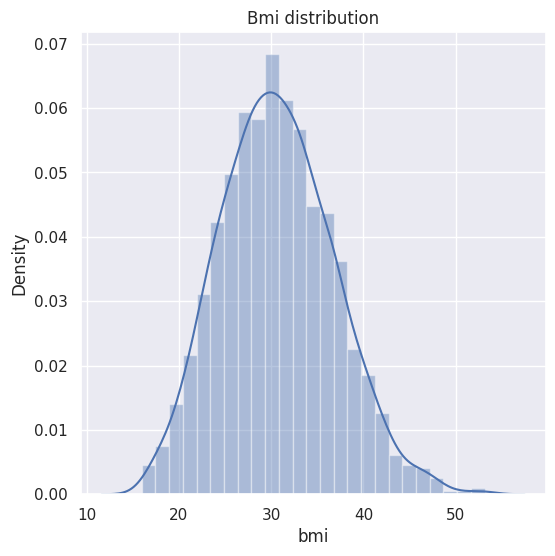

In [320]:
#Bmi Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Bmi distribution')
plt.show()

In [321]:
insurance_dataset['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
...,...
39.425,1
40.480,1
38.900,1


Normal bmi range --> 18.5 to 24.9

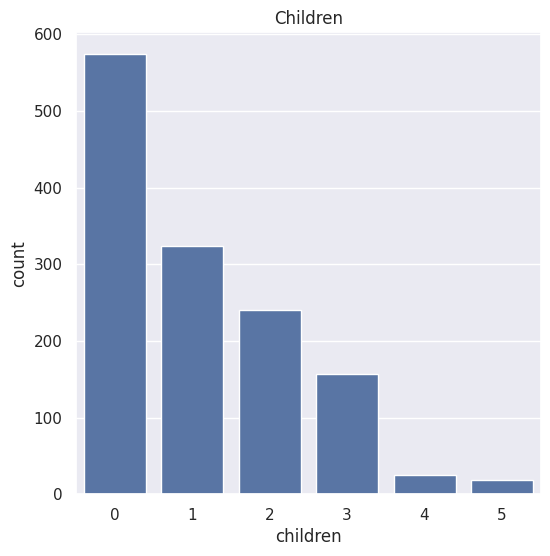

In [322]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

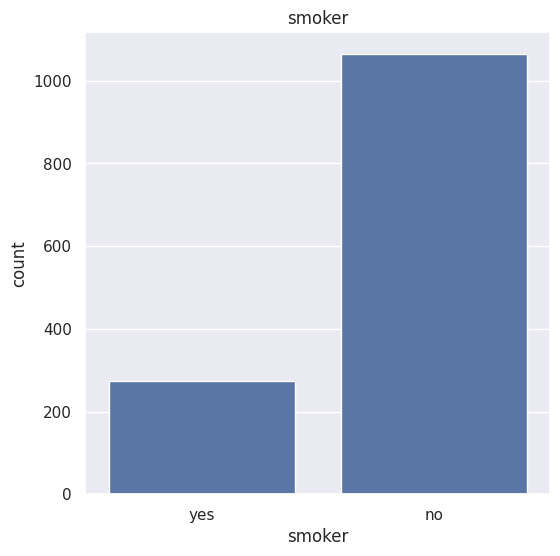

In [323]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [324]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


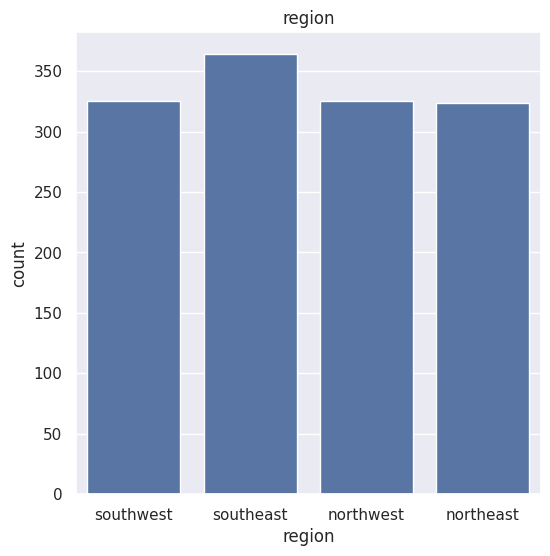

In [325]:
#region columns
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [326]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-2058231383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


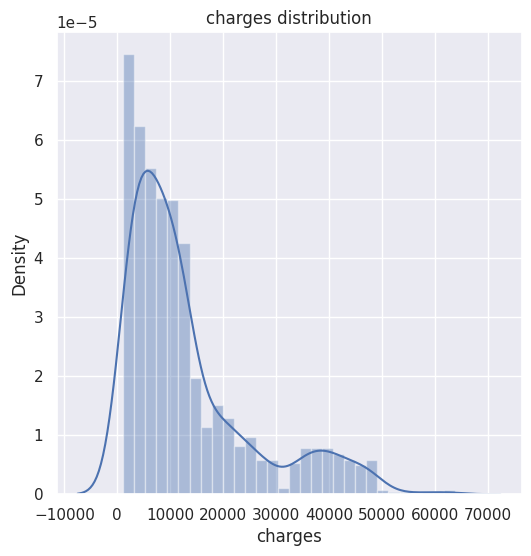

In [327]:
# distribution plot for charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

Data Preprocessing

Encoding the catagorical feature


In [328]:
# Encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

# Encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# Encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3 }},inplace=True)

/tmp/ipython-input-2293567767.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
/tmp/ipython-input-2293567767.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)
/tmp/ipython-input-2293567767.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

Spliting the Feature and Target

In [329]:
X=insurance_dataset.drop(columns='charges',axis=0)
Y=insurance_dataset['charges']

In [330]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [331]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliting it into train and test

In [332]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [333]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Evaluation


1.LinearRegression

In [334]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [335]:
# Prediction on training data
train_data_prediction=regressor.predict(X_train)

In [336]:
# R squared value
r2_train= metrics.r2_score(Y_train,train_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.751505643411174


In [337]:
#test data prediction
test_data_prediction=regressor.predict(X_test)

In [338]:
# R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.7447273869684076


Building Predictive system

male-->0

feamale-->1

yes-->0

no-->1

se-->0

sw-->1

ne-->2

nw-->3


In [339]:
input_data=(19,1,27.9,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

[25597.73941347]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2.Xgboost

In [340]:
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [341]:
# Prediction on training data
train_data_prediction=xgb.predict(X_train)

In [342]:
# R squared value
r2_train= metrics.r2_score(Y_train,train_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.9967362176093564


In [343]:
#test data prediction
test_data_prediction=xgb.predict(X_test)

In [344]:
# R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.8144316777193814


Building Predictive system


In [345]:
input_data=(19,1,27.9,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=xgb.predict(input_data_reshaped)
print(prediction)

[17430.785]


3.RandomForestRegressor

In [346]:
rfc=RandomForestRegressor(n_estimators=130)
rfc.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=130)

In [347]:
# Prediction on training data
train_data_prediction=rfc.predict(X_train)

In [348]:
# R squared value
r2_train= metrics.r2_score(Y_train,train_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.9777867990003903


In [349]:
#test data prediction
test_data_prediction=rfc.predict(X_test)

In [350]:
# R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.8356855821623728


Building Predictive system

In [351]:
input_data=(19,1,27.9,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rfc.predict(input_data_reshaped)
print(prediction)

[16982.28888015]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


4.Lasso

In [352]:
lass=Lasso(alpha=10)
lass.fit(X_train,Y_train)

Lasso(alpha=10)

In [353]:
# Prediction on training data
train_data_prediction=lass.predict(X_train)

In [354]:
# R squared value
r2_train= metrics.r2_score(Y_train,train_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.7514990246260761


In [355]:
#test data prediction
test_data_prediction=lass.predict(X_test)

In [356]:
# R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.7447279379954284


Building Predictive system

In [357]:
input_data=(19,1,27.9,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lass.predict(input_data_reshaped)
print(prediction)

[25547.98026614]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


overall best predictive model is RnadomForestRegressor